# Lec 16 - Hypothesis Testing
## Prof Sanchez, Spring 2025
### Sean Villegas

#### Vocab

**Total Variation Distance**  - _a statistical measure that defines the "distance" between two probability distributions, essentially representing the maximum possible difference in probability that the two distributions assign to any given event, calculated as half the sum of the absolute differences between the probabilities of each event under the two distributions across all possible events_
- For each category, compute the difference in proportions between two distributions
- Take the absolute value of each difference
- Sum, all distances and divide by 2


**Categorical distributions** - _a probability distribution that describes the possible outcomes of a categorical variable. Categorical variables can take on values that are not numbers, such as categories like "sunny", "cloudy", or "rainy"_
- Bar charts are commonly used to visualize categorical distributions
- One axis is categorical, one numeric
- The group method counts the number of rows for each value in the column
- Bar charts can display the distribution of a categorical variable (e.g. studios):
    - One bar for each category
    - Length of bar is the count of individuals in that category


**Null Hypothesis** - a well defined chance model that specifies exactly how data is generated for the **status quo**

**Status Quo** - the current state of affairs or the existing situation, typically represented by the "null hypothesis" in statistical testing, which assumes there is no significant effect or change happening unless proven otherwise by data analysis

**Alternative Hypothesis** - a different view about how the data was generated

**Test Statistic** - a quantity that helps us decide which hypothesis the data is more consistent with
**<center>When choosing a Test Statistic, Ask:</center>**

- What values of the statistic:
    - lean towards the null?
    - lean towards the alternative?
        - Here, the answer should be just high.
        - Make sure to **try** to avoid both high and low.


#### Choosing a test statistic
- Use alternative viewpoint (abs difference or just difference)
- Identify variable types in elements of table


**Tossing a coin Hypothesis**
Statement: 'You toss a coin that you believe is fair 400 times.' 
- Model:
    - Coin is fair
- Alternative Viewpoint
    - No, its not
    
    OR:
    - No, its biased towards heads

**Total Variation Distance** for Calculating two **Categorical distributions** 

**Hypothesis Analysis**

1. 
    - simulate a distribution of test statistics according to the null hypothesis and plot it
    - place the observed test statistic on this plot 

2. 
    - If the observed test statistic is close to the distribution of test statistics:
        - this points to the null hypothesis

3. 
    - If the observed test statistic is far away from the distribution of test statistics:
        - this points to the alternative hypothesis


**Using Data Visualization to Determine Tests**
- Visualizing data can be the answer
- Lec17 will cover using new tools to analyze data if the answer isn't clear



In [ ]:
from datascience import * 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


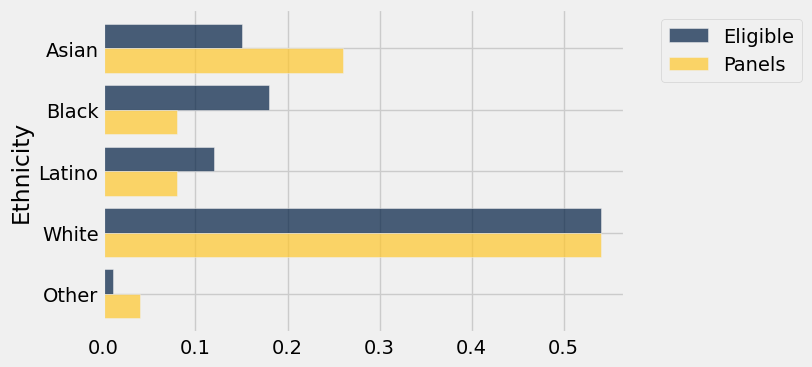

In [3]:
"""The ACLU compiled data on the composition of the jury panels in 11 felony trials in Alameda County in the years 2009 and 2010. 
In those panels, the total number of people who reported for jury service was 1453
"""
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury.show()

jury.barh('Ethnicity')

**[Sample Proportions](https://inferentialthinking.com/chapters/10/4/Random_Sampling_in_Python.html)** - _designed to generate a random sample of proportions from a given categorical distribution, typically using a multinomial sampling process. Its primary purpose is to simulate draws from a distribution_ 

`sample_proportions(<sample size>, <categorical distribution)>)`
- categories in population (list/array of proportions that add up to 1)

`table.barh('Label y horizontal') # Plot horizontal bar charts for the table` 

Sampe proportions of 1453 participants, using True distribution:  [ 0.14728149  0.18169305  0.12250516  0.54163799  0.00688231]


Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.147281
Black,0.18,0.08,0.181693
Latino,0.12,0.08,0.122505
White,0.54,0.54,0.541638
Other,0.01,0.04,0.00688231


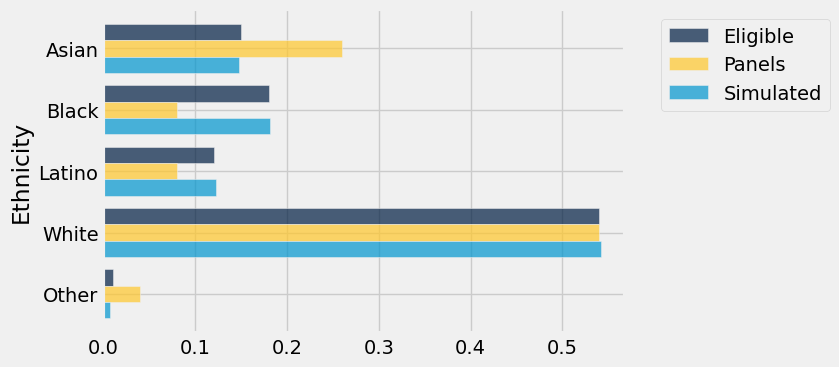

In [ ]:
# Below is the true distribution of people from which the 1453 jurors were randomly sampled.
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)
simulated = sample_proportions(1453, model)
print('Sample proportions of 1453 participants, using True distribution: ', simulated)


jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated.show()

jury_with_simulated.barh('Ethnicity')

In [8]:
## Calculating a new statistic
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


#### Question: How can you best combine/use together values in Difference column? 

In [10]:
sum(jury_with_difference.column('Difference'))


2.7755575615628914e-17

In [11]:
sum(jury_with_difference.where('Difference', are.above(0)).column('Difference'))


0.14000000000000001

In [12]:
sum(abs(jury_with_difference.column('Difference')))/2

0.14000000000000001

#### Answer: Total Variation Distance


In [13]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [ ]:
simulated_tvd = tvd(sample_proportions(1453, model), jury.column('Eligible'))
simulated_tvd

0.015251204404679981

In [19]:
def simulated_tvd():
    return tvd(sample_proportions(1453, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)
    # print(tvds)
print(tvds)

[ 0.01686855  0.01233999  0.01434274 ...,  0.00758431  0.02310392
  0.02589126]


The observed TVD of 0.14 is nowhere close to the simulated TVDs!


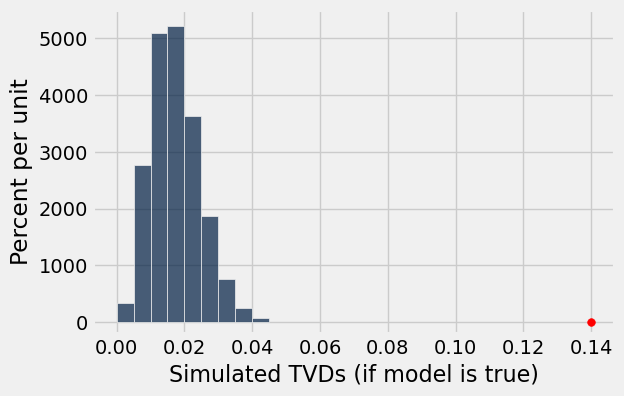

In [20]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('The observed TVD of ' + str(obsvd_tvd) + ' is nowhere close to the simulated TVDs!')

# Plotting details; ignore this code
plots.ylim(-2, 55)
plots.scatter(obsvd_tvd, 0, color='red', s=30);